# **Data Collection**

Importing pandas module to handle data

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
tweet = pd.read_csv('/content/drive/MyDrive/Twitter-sentiment-analysis/train_tweet.csv')

In [ ]:
# Load the dataset from the CSV file
data = pd.read_csv('/content/drive/MyDrive/Twitter-sentiment-analysis/train_tweet.csv')

# Display the first few rows of the dataset to ensure it loaded correctly
data.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


<Axes: >

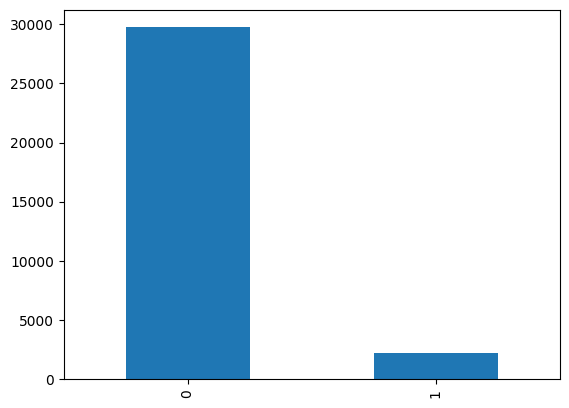

In [ ]:
data['label'].value_counts().plot.bar()

We can notice tweets are mostly negative tweets in the training dataset

# **Data Processing**

Importing required modules

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Pre-processing Data, includes removing special characters, converting into lower case, removing stopwords(like and, the)

In [ ]:
# Data Preprocessing
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]

    # Join the words back into a string
    text = ' '.join(words)

    return text

# Apply preprocessing to the 'tweet' column
data['tweet'] = data['tweet'].apply(preprocess_text)

# Display the preprocessed data
data.head(10)


,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit use cause offer w...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation
5,6,0,huge fan fare big talking leave chaos pay disp...
6,7,0,user camping tomorrow user user user user user...
7,8,0,next school year year exams think school exams...
8,9,0,love land allin cavs champions cleveland cleve...
9,10,0,user user welcome gr


# **Feature Extraction**

importing required modules

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

The TF-IDF vectorizer assigns a numerical value to each word based on its frequency in the text and its rarity in the entire dataset.

In [ ]:

# Feature Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features as needed
X = tfidf_vectorizer.fit_transform(data['tweet']).toarray()



We used .fit_transform() method to fit the vectorizer to the preprocessed text data and transform it into a feature matrix (X) represented as an array.

# **Data Splitting**

Splitting the data into training(80%) and testing(20%) sets

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42)

# Display the shape of the feature matrix and labels
print("Shape of feature matrix:", X.shape)
print("Shape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)

Shape of feature matrix: (31962, 5000)
Shape of training data: (25569, 5000)
Shape of testing data: (6393, 5000)


# **Model Building**

Importing required modules

In [ ]:
from sklearn.naive_bayes import MultinomialNB

The MultinomialNB is used for text classification tasks like sentiment analysis, spam detection, and document classification

In [ ]:
# Create the sentiment analysis model
sentiment_model = MultinomialNB()

# Train the model on the training data
sentiment_model.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = sentiment_model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9508837791334271


# **Evaluation**

importing required modules

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

1. accuracy_score for Model accuracy




2. classification_report includes 3 metrics:
*   Precision: It is the ratio of true positive predictions to the total positive predictions made by the model.
*   Recall: It is the ratio of true positive predictions to the total actual positive instances in the dataset.
*   F1-Score: It is calculated as the harmonic mean of precision and recall.




In [ ]:
# Make predictions on the testing data
y_pred = sentiment_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Model Accuracy: 0.9508837791334271
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.91      0.34      0.50       456

    accuracy                           0.95      6393
   macro avg       0.93      0.67      0.74      6393
weighted avg       0.95      0.95      0.94      6393



In [ ]:
# User Input
user_tweet = input("Enter a tweet: ")

# Preprocess the user input
user_tweet = preprocess_text(user_tweet)

# Vectorize the user input using the TF-IDF vectorizer
user_vector = tfidf_vectorizer.transform([user_tweet]).toarray()

# Make a prediction
prediction = sentiment_model.predict(user_vector)

if prediction[0] == 1:
    print("This is a positive tweet.")
else:
    print("This is a negative tweet.")

Enter a tweet: sweet
This is a negative tweet.
